## 汎化性（情報量基準AICによるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

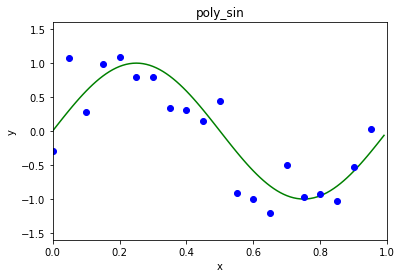

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

W
 [-0.05325079]


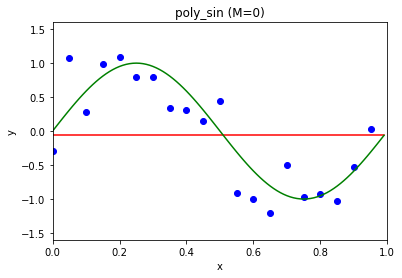

MSE= 0.5903789718318325
W
 [ 0.83309202 -1.86598486]


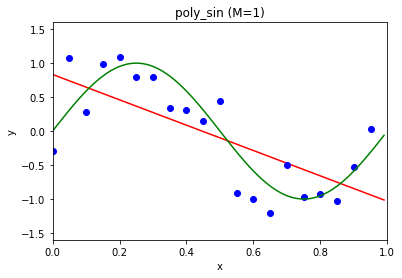

MSE= 0.3009460752498524
W
 [ 0.86820659 -2.10008198  0.24641802]


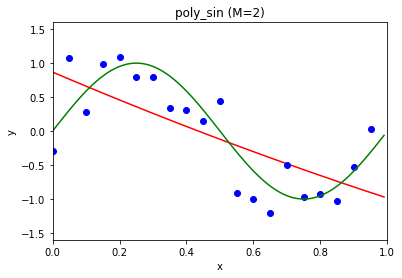

MSE= 0.3006129400430416
W
 [-1.47501259e-02  1.07235963e+01 -3.43793356e+01  2.42987745e+01]


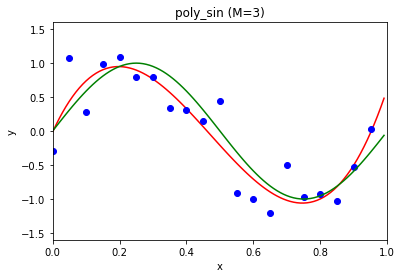

MSE= 0.09706084586938338
W
 [ -0.04494434  11.54999016 -38.53013109  31.20594743  -3.63535417]


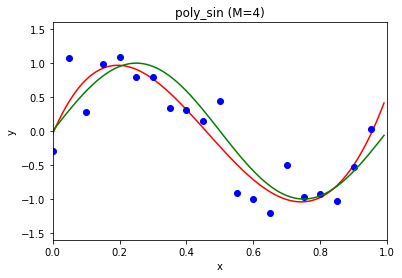

MSE= 0.09678313622312262
W
 [ -0.08957089  13.71936704 -56.14011768  82.35684668 -64.88748143
  25.79036937]


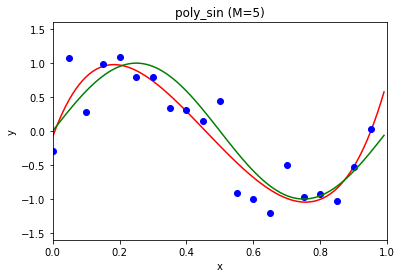

MSE= 0.09595590154484604
W
 [-1.17958763e-01  1.61454170e+01 -8.54331912e+01  2.12328781e+02
 -3.27184800e+02  2.70705364e+02 -8.59350858e+01]


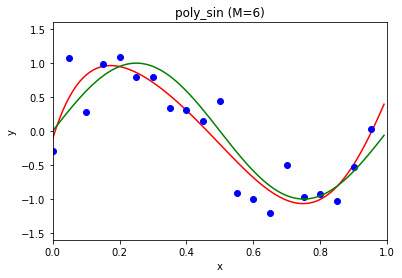

MSE= 0.09542988124777214
W
 [-2.16422549e-01  3.13427864e+01 -3.42690749e+02  1.82307372e+03
 -5.14096993e+03  7.67767505e+03 -5.74921171e+03  1.70324109e+03]


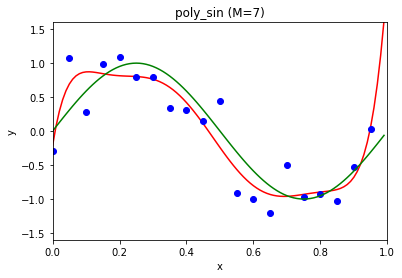

MSE= 0.08403886834927064
W
 [-2.21518656e-01  3.28523048e+01 -3.76781758e+02  2.10784786e+03
 -6.30894839e+03  1.02863491e+04 -8.98498572e+03  3.79687999e+03
 -5.50957604e+02]


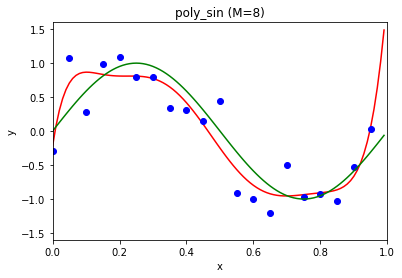

MSE= 0.08397604745043157
W
 [-2.34953757e-01  4.12366475e+01 -6.17922337e+02  4.67732672e+03
 -2.00256666e+04  5.15874330e+04 -8.23063759e+04  7.98724677e+04
 -4.32015053e+04  9.97673181e+03]


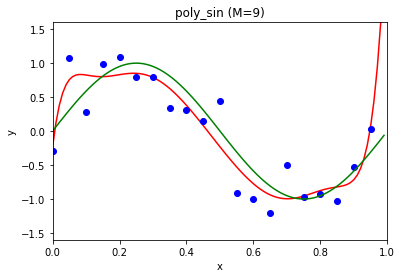

MSE= 0.08294626792165458
AIC[9]=-29.791245


In [4]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]

AIC = np.zeros(len(search_range))

for M in search_range:

    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate_aic = [y(x, W, M) for x in x_train]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_train - y_estimate_aic)).mean()
    print('MSE=', mse)
    AIC[M] = N*np.log(mse) + 2*(M+1)

print('AIC[%d]=%f'% (M, AIC[M]))



AIC
 [ -8.53981246 -20.01648365 -18.0386351  -38.6483444  -36.70565025
 -34.87733104 -32.98727058 -33.52951737 -31.5444734  -29.79124511]
The best order of the model is 3


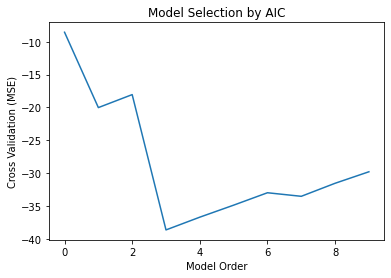

In [5]:
print('AIC\n', AIC)
print('The best order of the model is %d' % (np.argmin(AIC)))
                                                       
                                                       
plt.plot(AIC)
plt.title("Model Selection by AIC")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_AIC.eps')
plt.show()
plt.close()
